<a href="https://colab.research.google.com/github/santoshrsarangi/tensorflow/blob/main/kaggle-competition/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
r = files.upload()

Saving kaggle.json to kaggle.json


In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c titanic 

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 14.3MB/s]


In [4]:
!unzip -qq titanic.zip

In [5]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv("train.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
import seaborn as sns

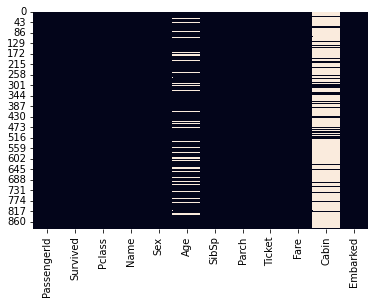

In [9]:
sns.heatmap(df.isnull(), cbar=False)

In [10]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [11]:
df_label = df["Survived"]

In [12]:
df_label.head(10)

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64

In [57]:
df_data = df[["PassengerId", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Survived"]]

In [58]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


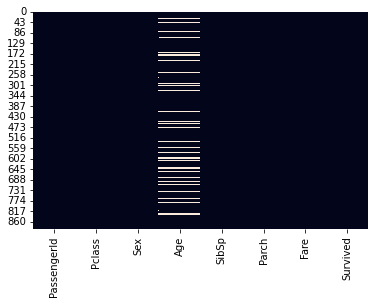

In [59]:
sns.heatmap(df_data.isnull(), cbar=False)

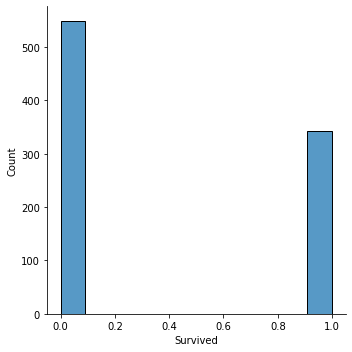

In [60]:
r = sns.displot(data=df_data["Survived"])

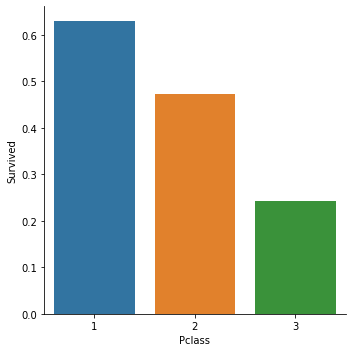

In [61]:
r = sns.catplot(data=df_data, x="Pclass", y="Survived", kind='bar', ci=None)

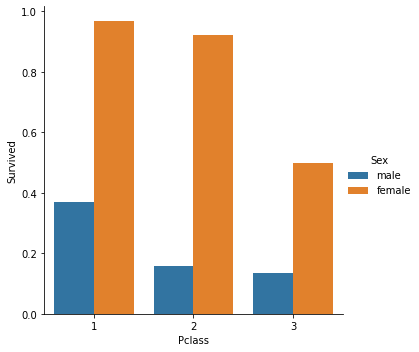

In [62]:
r = sns.catplot(data=df_data, y="Survived", x="Pclass", hue="Sex", kind="bar", ci=None)

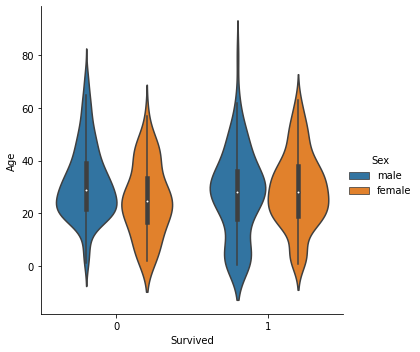

In [63]:
r= sns.catplot(data=df_data, x="Survived", y="Age", hue="Sex", kind="violin")

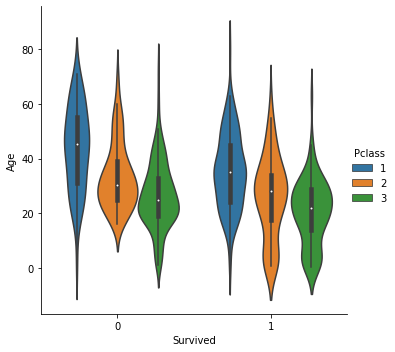

In [64]:
r=sns.catplot(data=df_data, x="Survived", y="Age", hue="Pclass", kind="violin")

In [65]:
encoding_ref = {"Sex": {"male": 0, "female": 1}}

In [66]:
df_data = df_data.replace(encoding_ref)

df_data.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,1,3,0,22.0,1,0,7.2500,0
1,2,1,1,38.0,1,0,71.2833,1
2,3,3,1,26.0,0,0,7.9250,1
3,4,1,1,35.0,1,0,53.1000,1
4,5,3,0,35.0,0,0,8.0500,0


In [67]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Survived     891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [68]:
mean_age = round(df_data["Age"].mean(), 2)
mean_age

29.7

In [69]:
#Fill blanks with mean of Age
df_data["Age"] = df_data["Age"].fillna(mean_age)

In [70]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Survived     891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [72]:
def return_data_and_label(df_data):
  #shuffle rows
  df_data = df_data.sample(frac = 1)
  return df_data[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]].to_numpy(), df_data["Survived"].to_numpy()

In [73]:
training_data, training_label = return_data_and_label(df_data)

In [74]:
training_data.shape

(891, 6)

In [75]:
#normalize data
training_data = training_data / 100.

In [76]:
training_data

array([[0.03    , 0.      , 0.22    , 0.      , 0.      , 0.07125 ],
       [0.03    , 0.      , 0.25    , 0.01    , 0.      , 0.178   ],
       [0.03    , 0.      , 0.28    , 0.02    , 0.      , 0.07925 ],
       ...,
       [0.03    , 0.      , 0.17    , 0.      , 0.      , 0.086625],
       [0.01    , 0.01    , 0.19    , 0.01    , 0.      , 0.910792],
       [0.03    , 0.      , 0.297   , 0.      , 0.      , 0.072292]])

In [77]:
training_label.shape

(891,)

In [78]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [79]:
def get_model():
  model = keras.Sequential([
      layers.Input(shape=(6,)),
      layers.Dense(64, activation="relu"),
      #layers.Dense(128, activation="relu"),
      #layers.Dense(256, activation="relu"),
      layers.Dropout(0.5),
      layers.Dense(1, activation="sigmoid")
  ])

  model.compile(optimizer="rmsprop",
                loss="binary_crossentropy",
                metrics=['accuracy'])

  return model

In [80]:
#Try various options. Training loss bottoms out around 320 epochs
epochs=500

In [81]:
model = get_model()

run_history = model.fit(training_data,
                        training_label,
                        epochs = epochs,
                        validation_split=0.3,
                        batch_size=32)

Epoch 1/500
20/20 [==============================] - 1s 11ms/step - loss: 0.6856 - accuracy: 0.6100 - val_loss: 0.6797 - val_accuracy: 0.6082
Epoch 2/500
20/20 [==============================] - 0s 3ms/step - loss: 0.6768 - accuracy: 0.6196 - val_loss: 0.6710 - val_accuracy: 0.6082
Epoch 3/500
20/20 [==============================] - 0s 3ms/step - loss: 0.6654 - accuracy: 0.6308 - val_loss: 0.6636 - val_accuracy: 0.6082
Epoch 4/500
20/20 [==============================] - 0s 4ms/step - loss: 0.6626 - accuracy: 0.6340 - val_loss: 0.6574 - val_accuracy: 0.6231
Epoch 5/500
20/20 [==============================] - 0s 4ms/step - loss: 0.6552 - accuracy: 0.6388 - val_loss: 0.6516 - val_accuracy: 0.6343
Epoch 6/500
20/20 [==============================] - 0s 4ms/step - loss: 0.6532 - accuracy: 0.6372 - val_loss: 0.6467 - val_accuracy: 0.6381
Epoch 7/500
20/20 [==============================] - 0s 4ms/step - loss: 0.6485 - accuracy: 0.6340 - val_loss: 0.6423 - val_accuracy: 0.6418
Epoch 8/500


In [82]:
import matplotlib.pyplot as plt

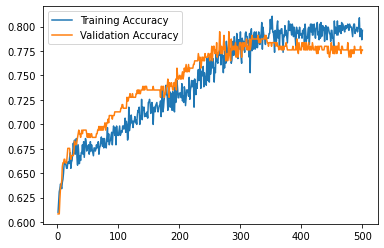

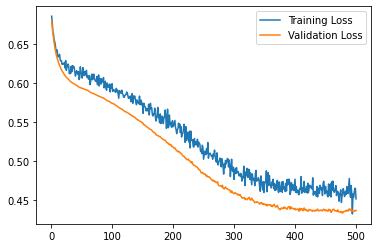

In [83]:
chart_epochs = range(1, epochs + 1)

plt.plot(chart_epochs, run_history.history['accuracy'], label="Training Accuracy")
plt.plot(chart_epochs, run_history.history['val_accuracy'], label="Validation Accuracy")
plt.legend()

plt.figure()
plt.plot(chart_epochs, run_history.history['loss'], label="Training Loss")
plt.plot(chart_epochs, run_history.history['val_loss'], label="Validation Loss")
plt.legend()

plt.show()

In [84]:
test_df = pd.read_csv("test.csv")

In [85]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [86]:
test_df["Age"] = test_df["Age"].fillna(mean_age)

In [87]:
test_df["Fare"] = test_df["Fare"].fillna(round(df_data["Fare"].mean(), 2))

In [88]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [89]:
test_df = test_df.replace(encoding_ref)

In [90]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S


In [91]:
test_data = test_df[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]].to_numpy()

In [92]:
test_data = test_data / 100.

In [93]:
test_data.shape

(418, 6)

In [94]:
test_data[0]

array([0.03    , 0.      , 0.345   , 0.      , 0.      , 0.078292])

In [95]:
prediction = (model.predict(test_data)>0.5).astype("int32")

In [96]:
test_df["Survived"] = prediction

In [97]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,1


In [98]:
output_df = test_df[["PassengerId", "Survived"]]

In [99]:
output_df.to_csv("mysubmission2.csv", index=False)

In [100]:
!kaggle competitions submit -c titanic -f mysubmission2.csv -m "Prediction 1 - SRS 12 SEPT"

100% 2.77k/2.77k [00:00<00:00, 14.3kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster